In [7]:
import weka.core.jvm as jvm
jvm.start()
help(jvm.start)
help(jvm.stop)

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Help on function start in module weka.core.jvm:

start(class_path=None, bundled=True, packages=False, system_cp=False, max_heap_size=None, system_info=False)
    Initializes the javabridge connection (starts up the JVM).
    
    :param class_path: the additional classpath elements to add
    :type class_path: list
    :param bundled: whether to add jars from the "lib" directory
    :type bundled: bool
    :param packages: whether to add jars from Weka packages as well (bool) or an alternative Weka home directory (str)
    :type packages: bool or str
    :param system_cp: whether to add the system classpath as well
    :type system_cp: bool
    :param max_heap_size: the maximum heap size (-Xmx parameter, eg 512m or 4g)
    :type max_heap_size: str
    :param system_info: whether to print the system info (generated by weka.core.SystemInfo)
    :type system_info: bool

Help on function stop in module weka.core.jvm:

stop()
    Kills the JVM.



COD MODELO LMT


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

MODELO LMT

recording predictions in-memory

Correctly Classified Instances         328               93.4473 %
Incorrectly Classified Instances        23                6.5527 %
Kappa statistic                          0.1164
Mean absolute error                      0.0902
Root mean squared error                  0.2392
Relative absolute error                 24.7206 %
Root relative squared error             64.5903 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,976    0,882    0,956      0,976    0,966      0,121    0,742     0,976     0
                 0,118    0,024    0,200      0,118    0,148      0,121    0,742     0,150     1
Weighted Avg.    0,934    0,841    0,919      0

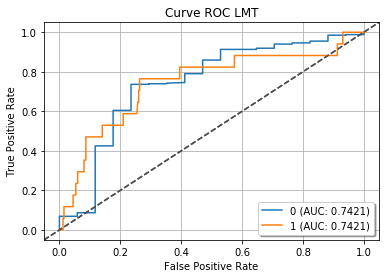

In [8]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
from weka.core.stemmers import Stemmer
from weka.core.stopwords import Stopwords
from weka.core.tokenizers import Tokenizer
from weka.filters import Filter, MultiFilter, StringToWordVector
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

# build classifier
helper.print_title("MODELO LMT")
cls = Classifier(classname="weka.classifiers.trees.LMT") 
cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC LMT", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

 
#Codigo para sacar la informaicón csv
#helper.print_title("recording/outputting predictions separately")
#outputfile = datasrc + "/LMTM.csv"
#output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution", "-suppress", "-file", outputfile])
#output.header = test
#output.print_all(cls, test)
#helper.print_info("Predictions stored in: " + outputfile)
# by using "-suppress" we don't store the output in memory, the following statement won't output anything
#print(output.buffer_content())

COD MODELO NAIVE BAYES


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

MODELO NAIVE BAYES

recording predictions in-memory

Correctly Classified Instances         119               33.9031 %
Incorrectly Classified Instances       232               66.0969 %
Kappa statistic                          0.0113
Mean absolute error                      0.6583
Root mean squared error                  0.803 
Relative absolute error                180.4958 %
Root relative squared error            216.8215 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,317    0,235    0,964      0,317    0,477      0,038    0,669     0,969     0
                 0,765    0,683    0,054      0,765    0,101      0,038    0,669     0,156     1
Weighted Avg.    0,339    0,257    0,92

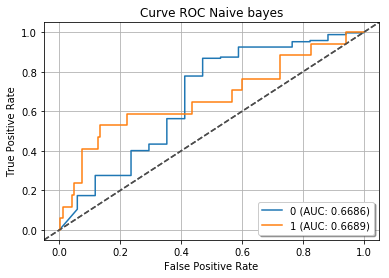

In [9]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

# build classifier
helper.print_title("MODELO NAIVE BAYES")
cls = classifier = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Naive bayes", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD SIMPLELOGISTIC


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

simple logistic

recording predictions in-memory

Correctly Classified Instances         331               94.302  %
Incorrectly Classified Instances        20                5.698  %
Kappa statistic                          0.1424
Mean absolute error                      0.087 
Root mean squared error                  0.2238
Relative absolute error                 23.8625 %
Root relative squared error             60.4381 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,985    0,882    0,956      0,985    0,971      0,158    0,727     0,971     0
                 0,118    0,015    0,286      0,118    0,167      0,158    0,727     0,173     1
Weighted Avg.    0,943    0,840    0,924  

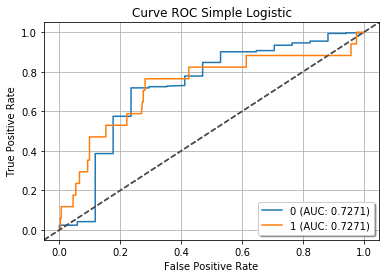

In [10]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

# build classifier
helper.print_title("simple logistic")
cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Simple Logistic", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD SMO POLINOMICO


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

SMO polinomico

recording predictions in-memory

Correctly Classified Instances         328               93.4473 %
Incorrectly Classified Instances        23                6.5527 %
Kappa statistic                          0.0506
Mean absolute error                      0.0666
Root mean squared error                  0.2394
Relative absolute error                 18.2713 %
Root relative squared error             64.6383 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,979    0,941    0,953      0,979    0,966      0,054    0,740     0,971     0
                 0,059    0,021    0,125      0,059    0,080      0,054    0,740     0,147     1
Weighted Avg.    0,934    0,897    0,913   

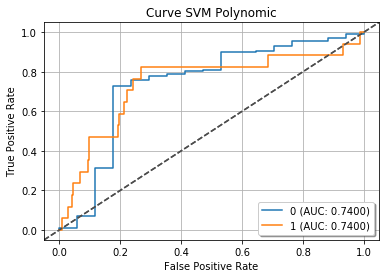

In [11]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("SMO polinomico")
#cmdline = 'weka.classifiers.functions.SMO -K "weka.classifiers.functions.supportVector.NormalizedPolyKernel -E 1.0"'
#cls = from_commandline(cmdline, classname="weka.classifiers.Classifier")
#cls.build_classifier(train)
kernel = Kernel(classname="weka.classifiers.functions.supportVector.PolyKernel", options=["-E", "1.0"])
cls = KernelClassifier(classname="weka.classifiers.functions.SMO",options=["-M"])
cls.kernel = kernel
cls.build_classifier(train)


# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve SVM Polynomic", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

SMO kenerl Radial

recording predictions in-memory

Correctly Classified Instances         319               90.8832 %
Incorrectly Classified Instances        32                9.1168 %
Kappa statistic                          0.1915
Mean absolute error                      0.1795
Root mean squared error                  0.2879
Relative absolute error                 49.2248 %
Root relative squared error             77.7538 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,940    0,706    0,963      0,940    0,952      0,196    0,721     0,980     0
                 0,294    0,060    0,200      0,294    0,238      0,196    0,721     0,130     1
Weighted Avg.    0,909    0,675    0,926

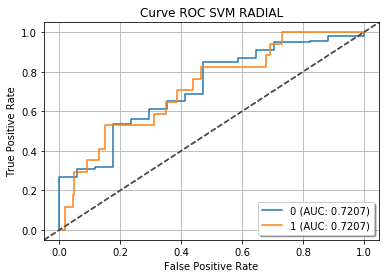

In [13]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("SMO kenerl Radial")
kernel = Kernel(classname="weka.classifiers.functions.supportVector.RBFKernel", options=["-G", "0.001"])
cls = KernelClassifier(classname="weka.classifiers.functions.SMO",options=["-M"])
#cls = KernelClassifier(classname="weka.classifiers.functions.SMO", options=["-M"])
cls.kernel = kernel
cls.build_classifier(train)

# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC SVM RADIAL", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD KNN IBK


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

creating KNN IBk
IB1 instance-based classifier
using 5 nearest neighbour(s) for classification


recording predictions in-memory

Correctly Classified Instances         319               90.8832 %
Incorrectly Classified Instances        32                9.1168 %
Kappa statistic                          0.0632
Mean absolute error                      0.122 
Root mean squared error                  0.2734
Relative absolute error                 33.4614 %
Root relative squared error             73.8268 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,949    0,882    0,955      0,949    0,952      0,063    0,674     0,969     0
                 0,118    0,051    0,105      0,118    0,11

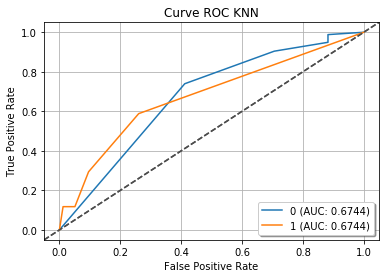

In [12]:
import os
import sys
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

# generate train/test split of randomized data
#train, test = data.train_test_split(66.0, Random(1)) # test true to J48
#train, test = data.train_test_split(66.0, Random(1)) # test true to J48
#train, test = data.train_test_split(66.0, Random(1))
train = data
test = dataTest

# build classifier
helper.print_title("creating KNN IBk")
cls = Classifier(classname="weka.classifiers.lazy.IBk",options=["-K", "5"]) 
cls.build_classifier(train)
print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC KNN", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

In [ ]:
COD BAGGING 


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

Creating Bagging
Bagging with 10 iterations and base learner

weka.classifiers.trees.REPTree -M 2 -V 0.001 -N 3 -S 1 -L -1 -I 0.0

recording predictions in-memory

Correctly Classified Instances         327               93.1624 %
Incorrectly Classified Instances        24                6.8376 %
Kappa statistic                         -0.0291
Mean absolute error                      0.3104
Root mean squared error                  0.3528
Relative absolute error                 85.1093 %
Root relative squared error             95.2654 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,979    1,000    0,951      0,979    0,965      -0,032   0,576     0,961     0
                 0,000   

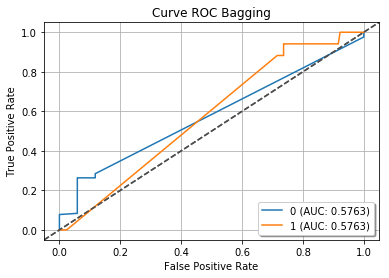

In [14]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("Creating Bagging")
cls = Classifier(classname="weka.classifiers.meta.Bagging",options=["-S", "1"])
cls.build_classifier(train)
print(cls)

# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Bagging", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#linea que muestra la predicciones
#helper.print_info("Predictions:")
#print(output.buffer_content())

COD Random Forest


Loading dataset: C:\Users\Fidelina Villa\Documents\train\CFS\Train.arff

Loading datasetTest: C:\Users\Fidelina Villa\Documents\train\CFS\Test.arff

Creating Random Forest
RandomForest

Bagging with 100 iterations and base learner

weka.classifiers.trees.RandomTree -K 0 -M 1.0 -V 0.001 -S 4 -do-not-check-capabilities

recording predictions in-memory

Correctly Classified Instances         329               93.7322 %
Incorrectly Classified Instances        22                6.2678 %
Kappa statistic                          0.1832
Mean absolute error                      0.2353
Root mean squared error                  0.2825
Relative absolute error                 64.5127 %
Root relative squared error             76.2804 %
Total Number of Instances              351     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,976    0,824    0,959      0,976    0,967      0,188    0,722  

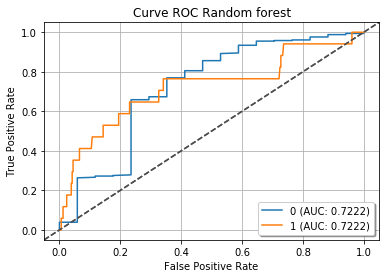

In [15]:
import os
import traceback
import weka.core.jvm as jvm
import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph


datasrc="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFile="Train.arff"
helper.print_info("Loading dataset: " + datasrc+nameFile)
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file(datasrc+nameFile)
data.class_is_last()

#Archivo de Test
datasrcTest="C:\Users\Fidelina Villa\Documents\\train\\CFS\\"
nameFileTest="Test.arff"
helper.print_info("Loading datasetTest: " + datasrcTest+nameFileTest)
#loader = Loader("weka.core.converters.ArffLoader")
dataTest = loader.load_file(datasrcTest+nameFileTest)
dataTest.class_is_last()

train = data
test = dataTest

helper.print_title("Creating Random Forest")
cls = Classifier(classname="weka.classifiers.trees.RandomForest",options=["-S", "4"]) 
cls.build_classifier(train)
print(cls)

# build classifier
#cls = classifier = Classifier(classname="weka.classifiers.functions.SimpleLogistic")
#cls.build_classifier(train)
#print(cls)

# evaluate and record predictions in memory
helper.print_title("recording predictions in-memory")
output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.CSV", options=["-distribution"])
evl = Evaluation(train)
evl.test_model(cls, test, output=output) #logica
print(evl.summary())
print(evl.class_details())
print(evl.matrix())
plot_cls.plot_roc(evl, title="Curve ROC Random forest", class_index=range(0, test.class_attribute.num_values), wait=False)
    
#helper.print_info("Predictions:")
#linea que muestra la predicciones
#print(output.buffer_content())
